## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
 
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most. 

### Objectives

Your main task is to cluster the countries by the factors mentioned above and then present your solution and recommendations to the CEO using a PPT.  The following approach is suggested : 

Start off with the necessary data inspection and EDA tasks suitable for this dataset - data cleaning, univariate analysis, bivariate analysis etc.
    
Outlier Analysis: You must perform the Outlier Analysis on the dataset. However, you do have the flexibility of not removing the outliers if it suits the business needs or a lot of countries are getting removed. Hence, all you need to do is find the outliers in the dataset, and then choose whether to keep them or remove them depending on the results you get.
    
Try both K-means and Hierarchical clustering(both single and complete linkage) on this dataset to create the clusters. [Note that both the methods may not produce identical results and you might have to choose one of them for the final list of countries.]
    
Analyse the clusters and identify the ones which are in dire need of aid. You can analyse the clusters by comparing how these three variables - [gdpp, child_mort and income] vary for each cluster of countries to recognise and differentiate the clusters of developed countries from the clusters of under-developed countries.
    
Also, you need to perform visualisations on the clusters that have been formed.  You can do this by choosing any two of the three variables mentioned above on the X-Y axes and plotting a scatter plot of all the countries and differentiating the clusters. Make sure you create visualisations for all the three pairs. You can also choose other types of plots like boxplots, etc. 
    
Both K-means and Hierarchical may give different results because of previous analysis (whether you chose to keep or remove the outliers, how many clusters you chose,  etc.) Hence, there might be some subjectivity in the final number of countries that you think should be reported back to the CEO since they depend upon the preceding analysis as well. Here, make sure that you report back at least 5 countries which are in direst need of aid from the analysis work that you perform.

### 1. Read and understanding the data

In [1]:
# Disabling warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

In [3]:
# Loading data dictionary for referecnce

data_dict = pd.read_csv('data-dictionary+.csv')
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [4]:
# Replacing current definition of inflation with the correct definition

data_dict['Description'].iloc[6:7] = 'The measurement of the annual growth rate of the GDP deflator'
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the GDP deflator
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [5]:
# loading the dataset

country = pd.read_csv('Country-data.csv')

In [6]:
# Loading first 5 rows of the dataset

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
# Looking at the number of rows and columns of the dataset

print("The dataset has {0} rows and {1} columns".format(country.shape[0], country.shape[1]))

The dataset has 167 rows and 10 columns


In [8]:
# Looking at data types of various columns

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
# Looking at statistics of numeric columns

country.describe(percentiles = [.25, .50, .75, .90, .99]).T

,count,mean,std,min,25%,50%,75%,90%,99%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,100.220,153.4000,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,70.800,160.4800,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,10.940,13.4740,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,75.420,146.0800,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,41220.000,84374.0000,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,16.640,41.4780,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,80.400,82.3700,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,5.322,6.5636,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,41840.000,79088.0000,105000.00


From the above statistics, we can see data figures gradually increase upto 75%ile but there is high variance at 99%ile especially for child_mort, exports, imports, income, and inflation.

This informs that we would have to take care of outliers of some of the features of the dataset as well as perform scaling (either standardisation or min-max) to aid clustering technique.

In [10]:
# Accounting for any missing values

country.isnull().mean()*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

From the above statistics, we can see there are no missing values in the dataset.

In [11]:
# Accounting for any duplicate values

country.duplicated().value_counts()

False    167
dtype: int64

From the above statistic, we can see all values are unique and hence no duplicates

In [12]:
# Accounting for all unique country names

country.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

All country names are unique. There are no duplicate or missing values in the dataset.

### 2. Data Preparation

In [13]:
# Let's look at the data dictionary

data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the GDP deflator
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


As per the data dictionary, exports, health, and imports are given in terms of %age of country's GDPP and hence must be converted into an absolute number since GDPP would vary from country to country even though %age spending might be the same.

In [14]:
# Let's look at first 5 rows of the dataframe

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Case in point: Australia and Argentina have similar health expenditure at around 8%age of GDPP but their huge variannce in their GDPP. 

In [15]:
# converting exports, health, and imports to absolute figures

country['exports'] = country['exports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100

In [16]:
# Let's look at first 5 rows:

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [17]:
# Let's look at statistics

country.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.600000,8.2500,19.300,62.10,208.00
exports,167.0,7420.618847,17973.885795,1.076920,447.1400,1777.440,7278.00,183750.00
health,167.0,1056.733204,1801.408906,12.821200,78.5355,321.886,976.94,8663.60
imports,167.0,6588.352108,14710.810418,0.651092,640.2150,2045.580,7719.60,149100.00
income,167.0,17144.688623,19278.067698,609.000000,3355.0000,9960.000,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.210000,1.8100,5.390,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.100000,65.3000,73.100,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.150000,1.7950,2.410,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.000000,1330.0000,4660.000,14050.00,105000.00


### 3. Data Visualisation

In [18]:
# Let's preset color scheme for all graphs

sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

### Univariate Analysis

#### Visualising Numerical Variables

In [19]:
# Let us visualise numercal variables:

def num_var(x):
    
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.title(x +' '+ 'Box Plot')
    plt.xticks(rotation=90)
    sns.boxplot(x = x, data = country, orient = 'v')
    
    plt.subplot(1,2,2)
    plt.title(x +' '+ 'Violin Plot')
    plt.xticks(rotation=90)
    sns.violinplot(x = x, data = country, orient = 'v')
    
    plt.tight_layout()
    plt.show()

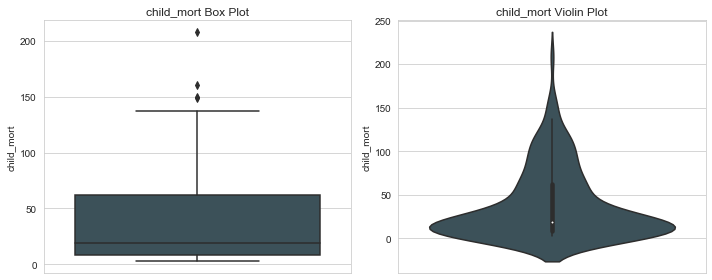

In [20]:
# Plots for child mortality

num_var('child_mort')

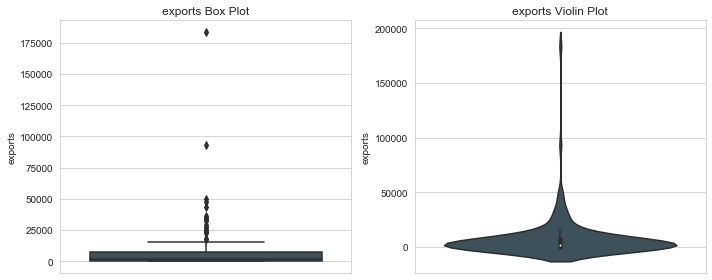

In [21]:
# Plots for exports

num_var('exports')

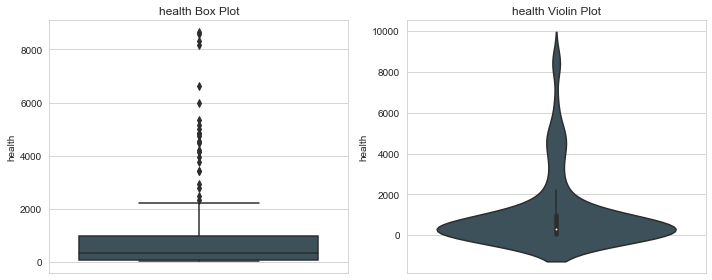

In [22]:
# Plots for health

num_var('health')

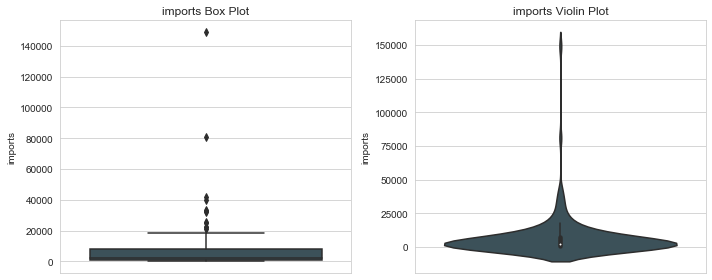

In [23]:
# Plots for imports

num_var('imports')

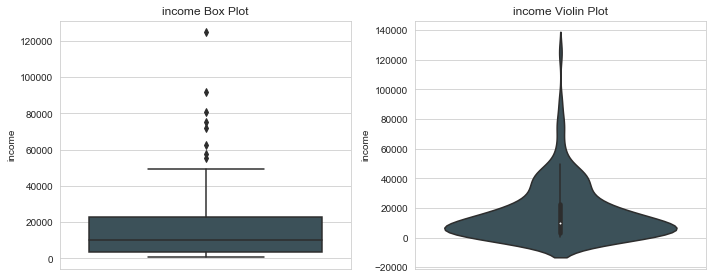

In [24]:
# Plots for income

num_var('income')

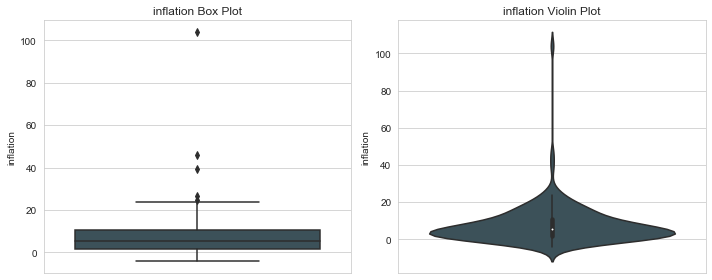

In [25]:
# Plots for inflation

num_var('inflation')

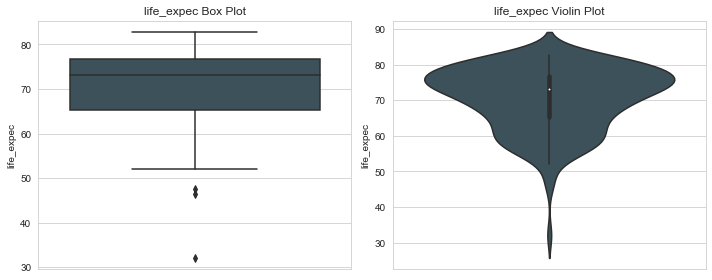

In [26]:
# Plots for life expectancy

num_var('life_expec')

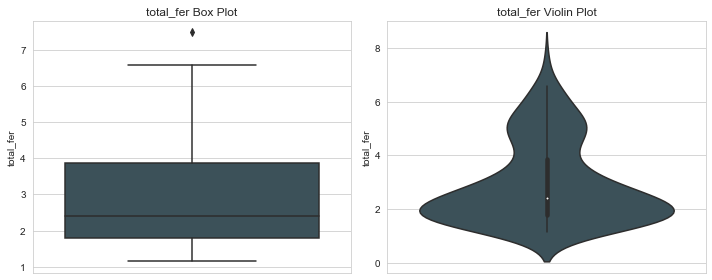

In [27]:
# Plots for total fertility

num_var('total_fer')

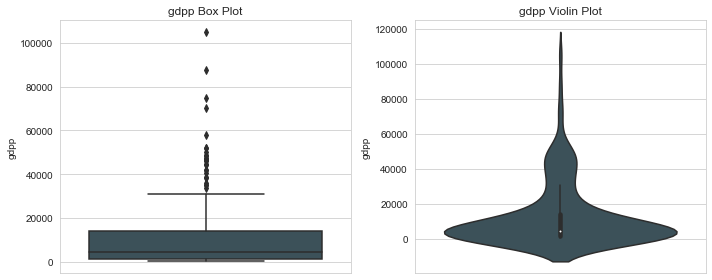

In [28]:
# Plots for gdpp

num_var('gdpp')

##### From all the above plots, we can clearly see outliers in all the numerical features

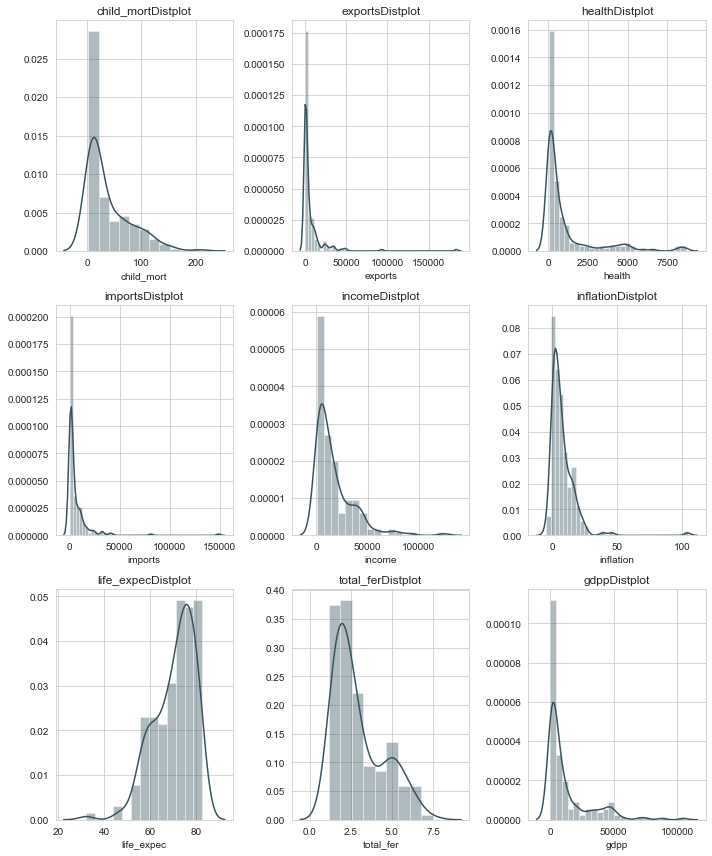

In [29]:
# Let's see the distribution of numerical features:

def dist_plot(x, fig):
    plt.subplot(3,3,fig)
    plt.title(x+''+'Distplot')
    sns.distplot(country[x])

plt.figure(figsize = (10,12))

dist_plot('child_mort',1)
dist_plot('exports',2)
dist_plot('health',3)
dist_plot('imports',4)
dist_plot('income',5)
dist_plot('inflation',6)
dist_plot('life_expec',7)
dist_plot('total_fer',8)
dist_plot('gdpp',9)

plt.tight_layout()
plt.show()

#### The business has specfied the usage of gdpp, child_mort, and income to cluster countries. Let's see how these three features behave with other features

### Bivariate Analysis

In [30]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [31]:
# Pair Plot for gdpp, child_mort, income

country_pairplot = country[['child_mort', 'income', 'gdpp']]
country_pairplot.head()

,child_mort,income,gdpp
0,90.2,1610,553
1,16.6,9930,4090
2,27.3,12900,4460
3,119.0,5900,3530
4,10.3,19100,12200


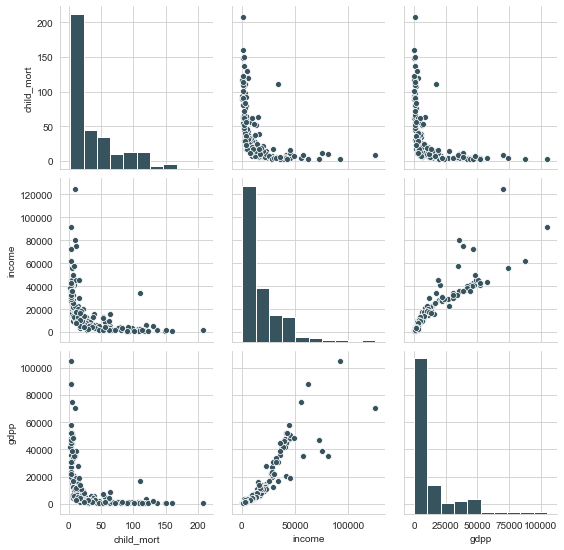

In [32]:
# Let's visualise how the three suggested features interact with each other:

sns.pairplot(country_pairplot)
plt.show()

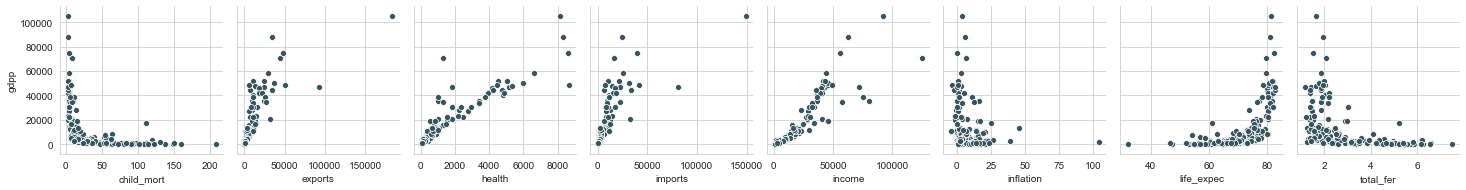

In [33]:
# GDPP

sns.pairplot(data = country, x_vars = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer'], y_vars = ['gdpp'])
plt.show()

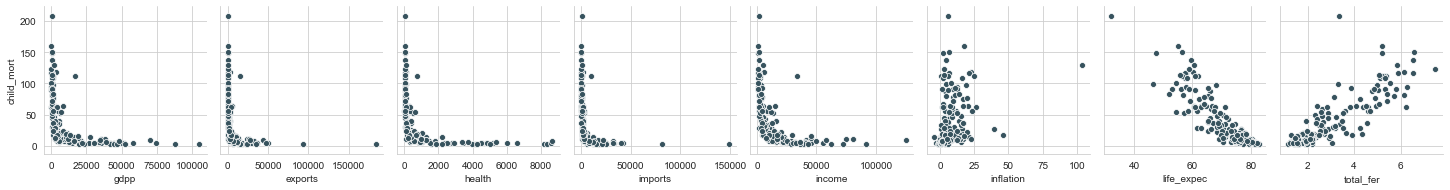

In [34]:
# Child_mort

sns.pairplot(data = country, x_vars = ['gdpp', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer'], y_vars = ['child_mort'])
plt.show()

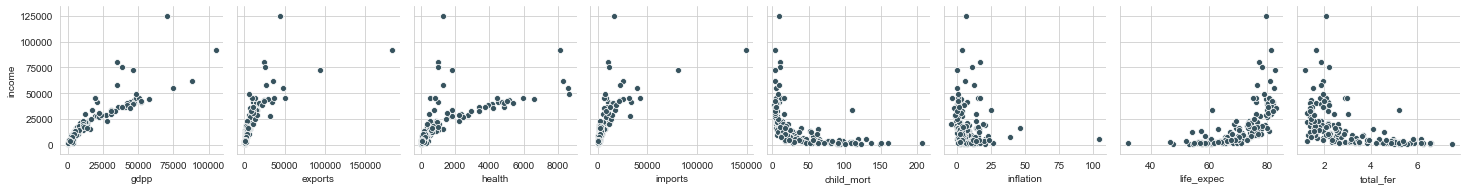

In [35]:
# income

sns.pairplot(data = country, x_vars = ['gdpp', 'exports', 'health', 'imports', 'child_mort','inflation', 'life_expec', 'total_fer'], y_vars = ['income'])
plt.show()

### 4. Outlier Treatment

In [36]:
#Now, let us perform outlier treatment:

for i in country.columns[1:]:
    # Finding outlier for all features
    Q1 = country[i].quantile(0.01)
    Q3 = country[i].quantile(0.99)
    # flooring and capping values
    country[i][country[i]<= Q1] = Q1
    country[i][country[i]>= Q3] = Q3

For outlier treatment, we floored and capped values at 1%ile and 99%ile, respectively. This ensured that we have a smoother distribution and at the same time we include all 167 countries and do not leave out any country from clustering exercise.

### Let's visualise data post outlier treatment

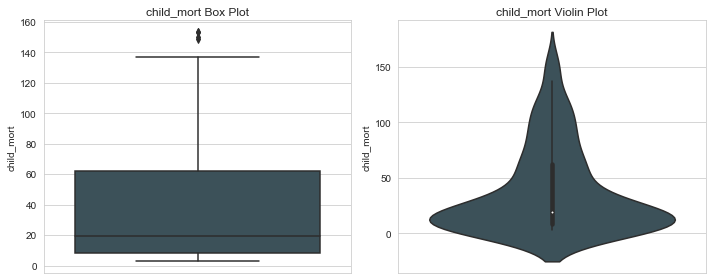

In [37]:
# Plots for child mortality post outlier treatment

num_var('child_mort')

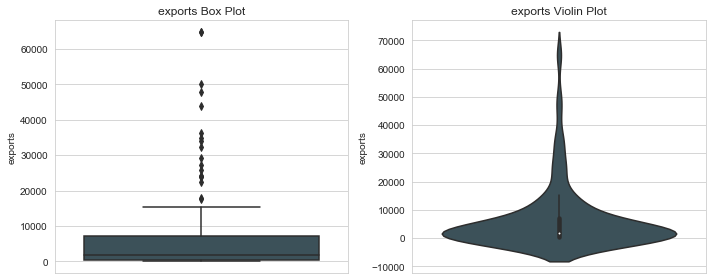

In [38]:
# Plots for exports post outlier treatment

num_var('exports')

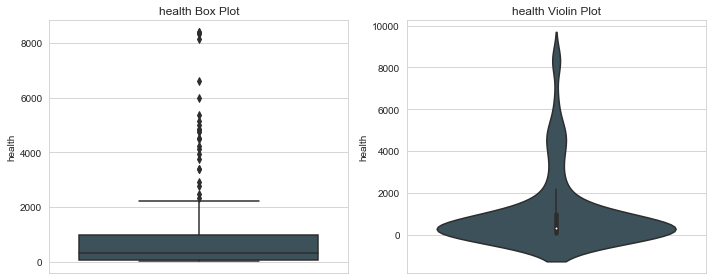

In [39]:
# Plots for health post outlier treatment

num_var('health')

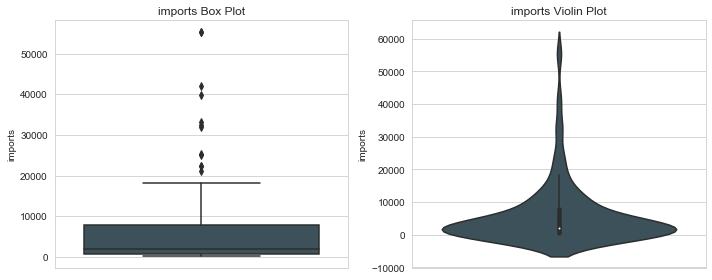

In [40]:
# Plots for imports post outlier treatment

num_var('imports')

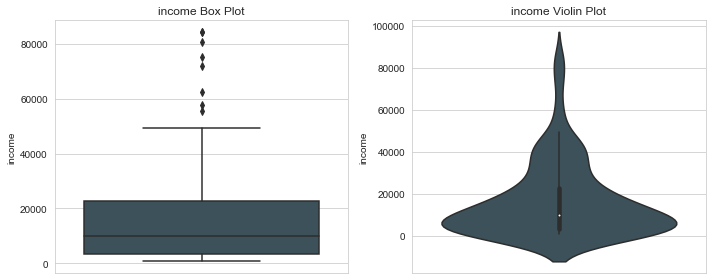

In [41]:
# Plots for income post outlier treatment

num_var('income')

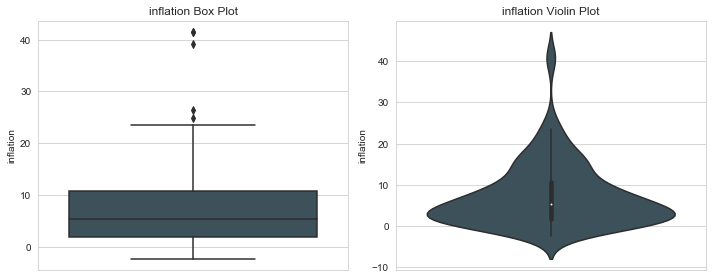

In [42]:
# Plots for inflation post outlier treatment

num_var('inflation')

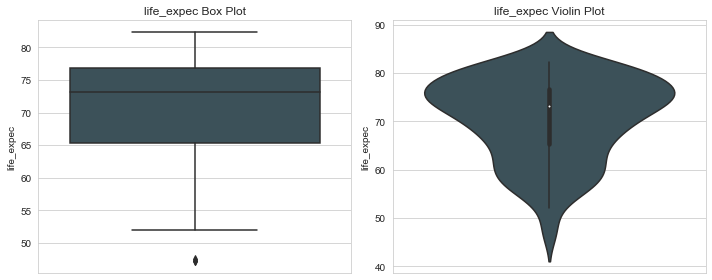

In [43]:
# Plots for life expectancy post outlier treatment

num_var('life_expec')

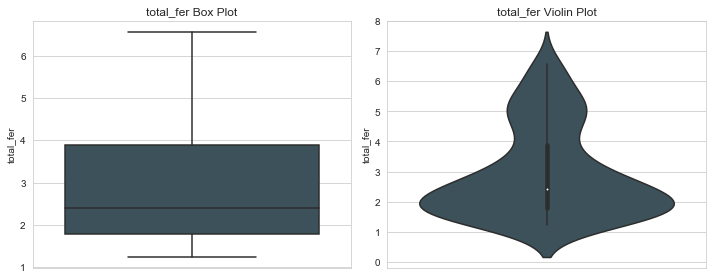

In [44]:
# Plots for total fertility post outlier treatment

num_var('total_fer')

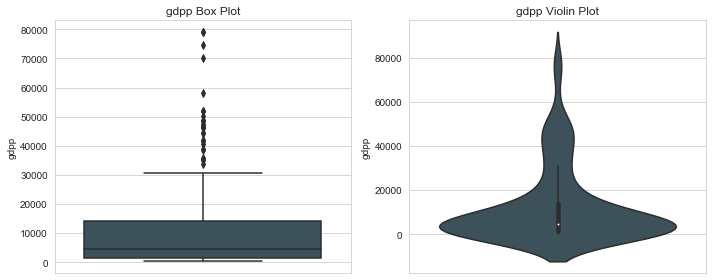

In [45]:
# Plots for GDPP post outlier treatment

num_var('gdpp')

#### From the above, we are getting a much smoother distribution post the outlier treatment

In [46]:
# Rechecking rows and columns:
country.shape

(167, 10)

In [47]:
# Rechecking statistics:
country.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,37.904790,39.026793,2.800000,8.2500,19.300,62.10,153.4000
exports,167.0,6538.351334,11415.230052,22.243716,447.1400,1777.440,7278.00,64794.2600
health,167.0,1054.240319,1790.825675,17.009362,78.5355,321.886,976.94,8410.3304
imports,167.0,5873.845499,9422.259867,104.909640,640.2150,2045.580,7719.60,55371.3900
income,167.0,16858.601677,17956.060832,742.240000,3355.0000,9960.000,22800.00,84374.0000
inflation,167.0,7.397332,7.770993,-2.348800,1.8100,5.390,10.75,41.4780
life_expec,167.0,70.645269,8.553975,47.160000,65.3000,73.100,76.80,82.3700
total_fer,167.0,2.942896,1.497595,1.243200,1.7950,2.410,3.88,6.5636
gdpp,167.0,12757.456527,17429.755235,331.620000,1330.0000,4660.000,14050.00,79088.0000


In [48]:
# Let's create a few copies of country dataset for further use:

country_kmeans = country.copy(deep = True)
country_hierarchal = country.copy(deep = True)

### 5. Re-scaling

In [49]:
# Before we start with the modeling process, it is important to scale the features of the dataset since all the features have different scales

import sklearn
from sklearn.preprocessing import StandardScaler

In [50]:
df = country[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
dtypes: float64(9)
memory usage: 11.9 KB


In [51]:
# instantiate

scaler = StandardScaler()

# fit_transform

df_scaled = scaler.fit_transform(df)
df_scaled.shape

(167, 9)

In [52]:
# Values have been successfully scaled but in return the resulting values are in a numpy array and it is therefore necessary to convert it into a DataFrame before further analysis

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = [['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


In [53]:
# Let's look at statistics again after scaling

df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-5.717316e-17,1.003008,-0.902210,-0.762143,-0.478152,0.621829,2.968283
exports,167.0,1.256480e-16,1.003008,-0.572543,-0.535209,-0.418321,0.064990,5.118698
health,167.0,1.595530e-17,1.003008,-0.580933,-0.546474,-0.410178,-0.043294,4.120007
imports,167.0,-1.076983e-16,1.003008,-0.614108,-0.557124,-0.407522,0.196482,5.269055
income,167.0,-1.728491e-17,1.003008,-0.900244,-0.754298,-0.385349,0.331881,3.771342
inflation,167.0,-1.548994e-16,1.003008,-1.257940,-0.721161,-0.259088,0.432731,4.398816
life_expec,167.0,1.598189e-15,1.003008,-2.753796,-0.626767,0.287833,0.721681,1.374799
total_fer,167.0,1.622122e-16,1.003008,-1.138364,-0.768798,-0.356905,0.627621,2.424951
gdpp,167.0,-3.988825e-17,1.003008,-0.715054,-0.657601,-0.465974,0.074380,3.817038


In [54]:
# Before we begin with the modelling process, it is prudent to check Hopkins statistic to see how well suited is our data for clustering

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [55]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter

hopkins(df_scaled)

0.9119241790793962

**Hopkins Value suggest data is highly suitable for clustering**

In [56]:
# Right before the modelling process, it is useful to make use of copy of df_sclaed

df_1 = df_scaled.copy(deep = True)
df_2 = df_scaled.copy(deep = True)

### 6a. Modelling using KMeans Clustering

In [57]:
from sklearn.cluster import KMeans

In [58]:
# K-means with some arbitrary k

kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 50)
kmeans.fit(df_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [59]:
# Accouting for labels

kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

#### FInding the Optimal Number of Clusters
#### SSD

In [60]:
# elbow-curve/SSD

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 500)
    kmeans.fit(df_1)
    ssd.append(kmeans.inertia_)

In [61]:
# Converting SSD values into a dataframe

ssd = pd.DataFrame(ssd)
ssd['Number of Clusters'] = range_n_clusters
ssd.columns = ['SSD Value', 'Number of Clusters']
ssd

,SSD Value,Number of Clusters
0,840.507880,2
1,547.793999,3
2,434.246319,4
3,374.918335,5
4,334.359326,6
5,300.909872,7
6,270.773118,8


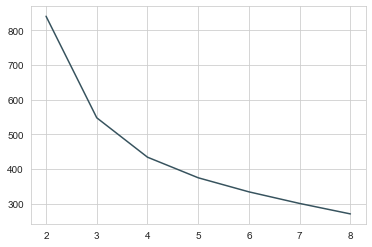

In [62]:
# Plotting SSD Value vs Number of Clusters

plt.plot('Number of Clusters', 'SSD Value', data = ssd)
plt.show()

#### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [63]:
from sklearn.metrics import silhouette_score

In [64]:
# silhouette analysis

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.46939980287788113
For n_clusters=3, the silhouette score is 0.40708993455880516
For n_clusters=4, the silhouette score is 0.39539142309551445
For n_clusters=5, the silhouette score is 0.38612511707914937
For n_clusters=6, the silhouette score is 0.2968564670600082
For n_clusters=7, the silhouette score is 0.30543839090168473
For n_clusters=8, the silhouette score is 0.2960652649008463


In [65]:
# From both, the elbow curve and silhouette score analysis, we will build our final model with k=3

kmeans = KMeans(n_clusters=3, max_iter= 100, random_state = 50)
kmeans.fit(df_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [66]:
# Acconting for KMeans Labels

kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [67]:
# assign the label

country_kmeans['kmeans_cluster_id'] = kmeans.labels_
country_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [68]:
# To see how many countries belong to each assigned label:

country_kmeans['kmeans_cluster_id'].value_counts()

0    90
2    48
1    29
Name: kmeans_cluster_id, dtype: int64

#### Visualising Clusters

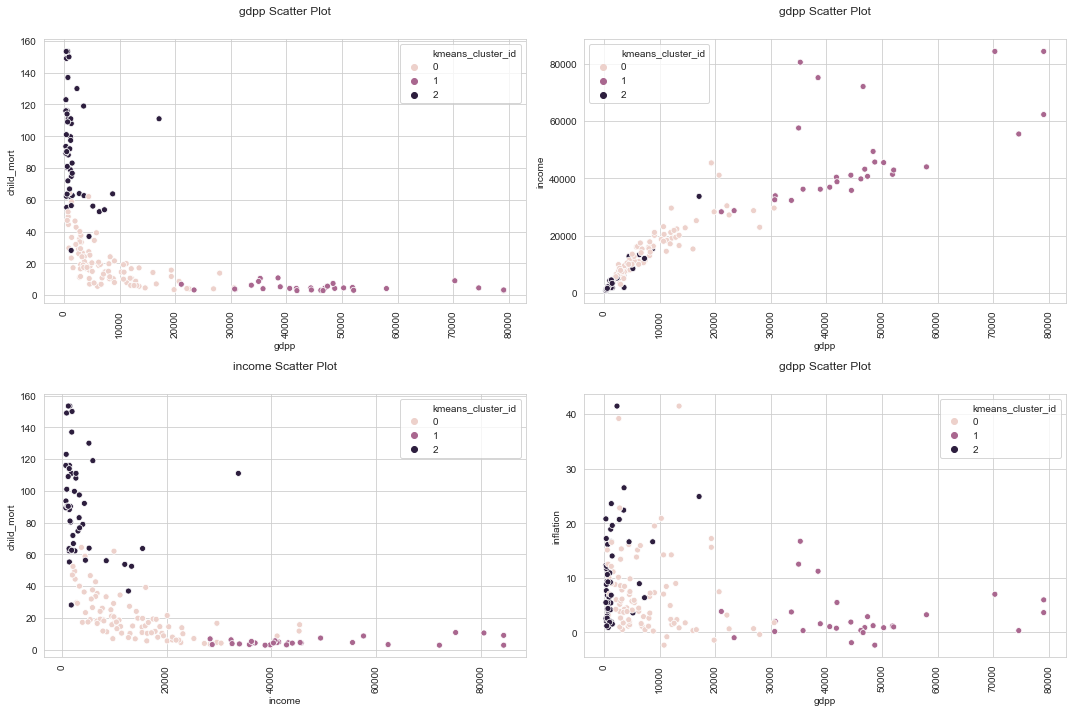

In [69]:
# Let's visualise clusters

def scat_var(x,y,fig):
    plt.subplot(2,2,fig)
    plt.title(x +' '+ 'Scatter Plot')
    plt.xticks(rotation=90)
    sns.scatterplot(x = x, y = y, data = country_kmeans, hue = 'kmeans_cluster_id')

plt.figure(figsize = (15,10))

plt.rcParams['axes.titlesize']= 12
plt.rcParams['axes.titleweight']= 10
plt.rcParams['axes.titlepad']= 25
plt.rcParams['axes.labelsize']= 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['ytick.labelsize']= 10

scat_var('gdpp', 'child_mort', 1)
scat_var('gdpp', 'income', 2)
scat_var('income', 'child_mort', 3)
scat_var('gdpp', 'inflation', 4)

plt.tight_layout()
plt.show()

From the above graphs, country with label = 2 is standing out and is of interest.

From the following 4 plots, we could see that cluster 2 is coming out to be the cluster of interest. 

(Anti-clock-wise) cluster labelled 2 countries represent very high child mortality rate (from 60 to up to 160) and very low GDPP figures (tending to 0) and income figures in the first plot and third plot.

In the income vs GDPP plot, cluster 2 countries represent the bottom countries which also seem to have a very high inflation as evident from the fourth plot.

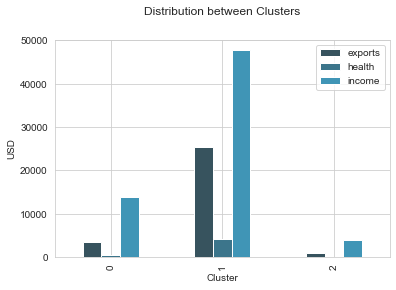

In [70]:
# Let's plot exports, health, and income vs cluster labels

country_kmeans[['exports', 'health', 'income']].groupby(country_kmeans['kmeans_cluster_id']).mean().plot(kind = 'bar')
plt.title('Distribution between Clusters')
plt.xlabel('Cluster')
plt.ylabel('USD')
plt.xticks(rotation=90)
plt.show()

#### From the above, cluster 2 is coming out to be the cluster of importance.

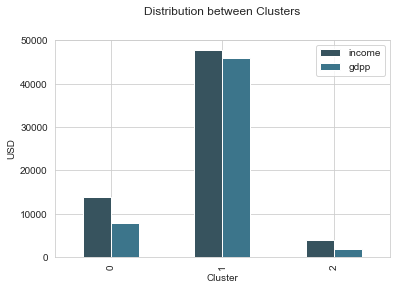

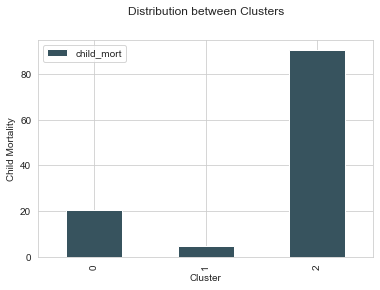

In [71]:
# Let's plot income, GDP and child mortality vs cluster labels

country_kmeans[['income', 'gdpp']].groupby(country_kmeans['kmeans_cluster_id']).mean().plot(kind = 'bar')
plt.title('Distribution between Clusters')
plt.xlabel('Cluster')
plt.ylabel('USD')
plt.xticks(rotation=90)
plt.show()

country_kmeans[['child_mort']].groupby(country_kmeans['kmeans_cluster_id']).mean().plot(kind = 'bar')
plt.title('Distribution between Clusters')
plt.xlabel('Cluster')
plt.ylabel('Child Mortality')
plt.xticks(rotation=90)


plt.show()

These graphs were also very helpful in terms of helping the analyst pitch which cluster of countries to focus on. Clearly, cluster 2 labelled countries need the most help which is evident from very low exports, expenditure on health, income and GDPP figures.

Also, cluster 2 labelled countries have the highest child mortality rate.

In [72]:
country_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [73]:
# Let's obtain only countries that were labelled 2

country_kmeans = country_kmeans[country_kmeans.kmeans_cluster_id == 2]
country_kmeans_country = country_kmeans['country']
country_kmeans_country = pd.DataFrame(country_kmeans_country)
country_kmeans_country.reset_index(inplace = True)
country_kmeans_country.drop(columns = ['index'], inplace = True)
country_kmeans_country.head()

,country
0,Afghanistan
1,Angola
2,Benin
3,Botswana
4,Burkina Faso


In [74]:
# Standardizing the resultant dateframe

country_kmeans.drop(columns = ['country', 'kmeans_cluster_id'], axis =1, inplace = True)
country_kmeans.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0
3,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0
17,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0
21,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0
25,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0


In [75]:
# Merging country name with scaled data

country_kmeans_scaled = pd.DataFrame(scaler.fit_transform(country_kmeans), columns=country_kmeans.columns)
country_kmeans_scaled = pd.concat([country_kmeans_country, country_kmeans_scaled], axis =1)
country_kmeans_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-0.004438,-0.369603,-0.446032,-0.379766,-0.414324,-0.138755,-0.646033,0.860489,-0.469379
1,Angola,0.939388,0.592269,-0.087555,0.450607,0.361513,1.400063,0.102249,1.205592,0.559287
2,Benin,0.677214,-0.313474,-0.512242,-0.357678,-0.376346,-1.154541,0.428424,0.393586,-0.398543
3,Botswana,-1.239933,0.847738,2.517265,1.593899,1.699788,-0.200498,-0.473353,-2.123632,1.533703
4,Burkina Faso,0.841073,-0.344882,-0.465349,-0.430988,-0.446877,-0.451031,-0.319859,0.911240,-0.461777


In [76]:
# Finding mean of income, gdpp and child_mort for each country and then taking mean as parameter to sort and find worst affected country

country_kmeans_scaled['Mean']=country_kmeans_scaled[['income','gdpp','child_mort']].mean(axis=1)
country_kmeans_scaled=country_kmeans_scaled.sort_values(by=['Mean'])
country_kmeans_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Mean
39,Solomon Islands,-2.039563,-0.109081,-0.028367,0.144390,-0.383580,-0.451031,0.409237,-0.743222,-0.214717,-0.879287
14,Eritrea,-1.151449,-0.384055,-0.598176,-0.468958,-0.448686,0.117714,0.409237,-0.367670,-0.493912,-0.698015
27,Madagascar,-0.922047,-0.348089,-0.598176,-0.426141,-0.454111,-0.215934,0.236556,-0.377820,-0.517754,-0.631304
36,Rwanda,-0.876166,-0.364102,-0.340985,-0.431840,-0.461345,-0.949722,0.965652,-0.469170,-0.465923,-0.601145
22,Kenya,-0.922047,-0.304606,-0.421507,-0.329517,-0.256987,-1.011465,0.620291,-0.611271,-0.326326,-0.501786


**From both K-Means Clustering, countries which are in dire need of aid are:**

1. Solomon Islands
2. Eritrea
3. Madagascar
4. Rwanda
5. Kenya

### 6b. Modelling using Hierarchical Clustering

In [77]:
# Importing required libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

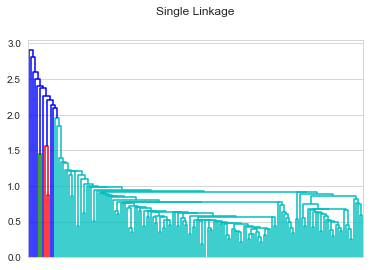

In [78]:
# Single Linkage

single_linkage = linkage(df_2, method="single", metric='euclidean')
dendrogram(single_linkage)
plt.title('Single Linkage')
plt.xticks(ticks=[])
plt.show()

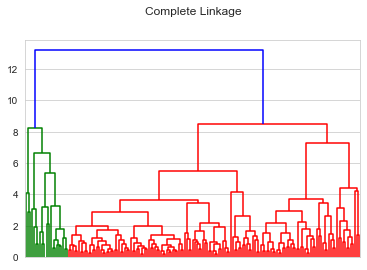

In [79]:
# Complete Linkage

complete_linkage = linkage(df_2, method="complete", metric='euclidean')
dendrogram(complete_linkage)
plt.title('Complete Linkage')
plt.xticks(ticks=[])
plt.show()

In [80]:
# Let's cut the tree at 3 clusters

h_cluster_id = cut_tree(complete_linkage, n_clusters=3).reshape(-1)
h_cluster_id

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [81]:
# Let's look at how many countries are there in each cluster

country_hierarchal['h_cluster_id'] = h_cluster_id
country_hierarchal.h_cluster_id.value_counts()

1    96
0    50
2    21
Name: h_cluster_id, dtype: int64

#### Visualising Clusters

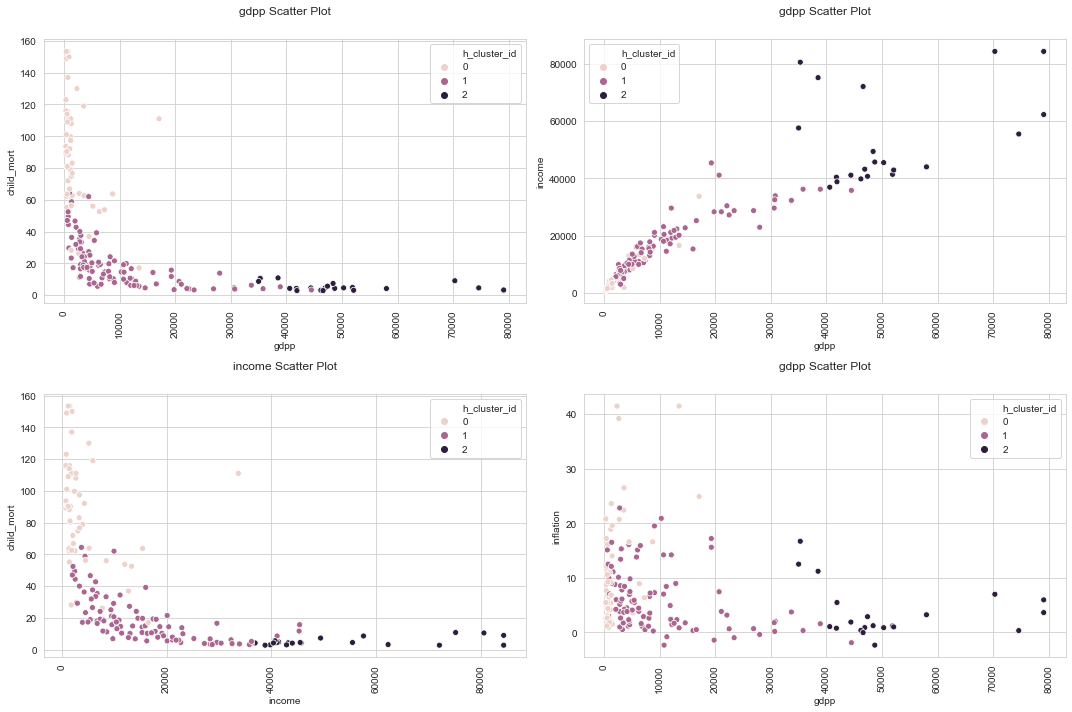

In [82]:
# Let's visualise clusters

def scat_var(x,y,fig):
    plt.subplot(2,2,fig)
    plt.title(x +' '+ 'Scatter Plot')
    plt.xticks(rotation=90)
    sns.scatterplot(x = x, y = y, data = country_hierarchal, hue = 'h_cluster_id')

plt.figure(figsize = (15,10))

plt.rcParams['axes.titlesize']= 12
plt.rcParams['axes.titleweight']= 10
plt.rcParams['axes.titlepad']= 25
plt.rcParams['axes.labelsize']= 10
plt.rcParams['xtick.labelsize']= 10
plt.rcParams['ytick.labelsize']= 10

scat_var('gdpp', 'child_mort', 1)
scat_var('gdpp', 'income', 2)
scat_var('income', 'child_mort', 3)
scat_var('gdpp', 'inflation', 4)

plt.tight_layout()
plt.show()

From the following 4 plots, we could see that cluster 0 is coming out to be the cluster of interest. 

(Anti-clock-wise) cluster labelled 0 countries represent very high child mortality rate (from 60 to up to 160) and very low GDPP figures (tending to 0) and income figures in the first plot and third plot.

In the income vs GDPP plot, cluster 0 countries represent the bottom countries which also seem to have a very high inflation as evident from the fourth plot.

In [83]:
# From the above visuals, countries with h_clutser_id = 0 stand out

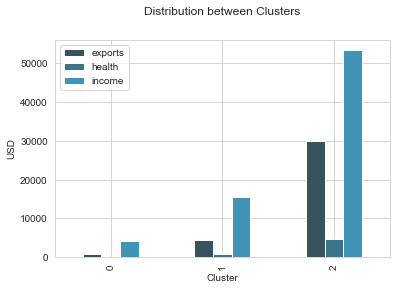

In [84]:
# Let's plot exports, health, and income vs cluster labels

country_hierarchal[['exports', 'health', 'income']].groupby(country_hierarchal['h_cluster_id']).mean().plot(kind = 'bar')
plt.title('Distribution between Clusters')
plt.xlabel('Cluster')
plt.ylabel('USD')
plt.xticks(rotation=90)
plt.show()

#### Cluster 0 is coming out to be cluster of importance.

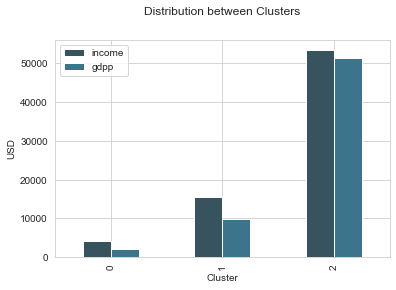

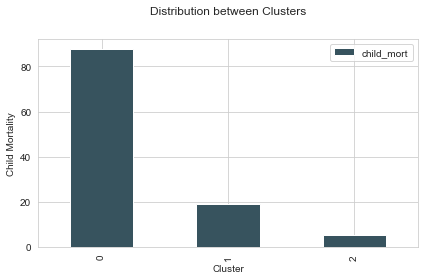

In [85]:
# Let's plot income, GDP and child mortality vs cluster labels

country_hierarchal[['income', 'gdpp']].groupby(country_hierarchal['h_cluster_id']).mean().plot(kind = 'bar')
plt.title('Distribution between Clusters')
plt.xlabel('Cluster')
plt.ylabel('USD')
plt.xticks(rotation=90)


country_hierarchal[['child_mort']].groupby(country_hierarchal['h_cluster_id']).mean().plot(kind = 'bar')
plt.title('Distribution between Clusters')
plt.xlabel('Cluster')
plt.ylabel('Child Mortality')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Clearly, cluster 0 labelled countries need the most help which is evident from very low exports, expenditure on health, income and GDPP figures.

Also, cluster 0 labelled countries have the highest child mortality rate.


In [86]:
# Let's obtain only countries that were labelled 0

country_hierarchal = country_hierarchal[country_hierarchal.h_cluster_id == 0]
country_hierarchal_country = country_hierarchal['country']
country_hierarchal_country = pd.DataFrame(country_hierarchal_country)
country_hierarchal_country.reset_index(inplace = True)
country_hierarchal_country.drop(columns = ['index'], inplace = True)
country_hierarchal.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,h_cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [87]:
# Standardizing the resultant dateframe

country_hierarchal.drop(columns = ['country', 'h_cluster_id'], axis =1, inplace = True)
country_hierarchal.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0
3,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0
17,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0
21,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0
25,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0


In [88]:
# Merging country name with scaled data

country_hierarchal_scaled = pd.DataFrame(scaler.fit_transform(country_hierarchal), columns=country_hierarchal.columns)
country_hierarchal_scaled = pd.concat([country_hierarchal_country, country_hierarchal_scaled], axis =1)
country_hierarchal_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.079686,-0.400437,-0.475575,-0.412311,-0.457958,-0.233359,-0.677095,0.878238,-0.491186
1,Angola,0.957629,0.563799,-0.145526,0.424912,0.292142,1.049324,0.014832,1.194400,0.419911
2,Benin,0.713756,-0.344170,-0.536534,-0.390040,-0.421240,-1.080069,0.316441,0.450490,-0.428447
3,Botswana,-1.069567,0.819898,2.252728,1.577634,1.586023,-0.284825,-0.517420,-1.855632,1.282959
4,Burkina Faso,0.866176,-0.375655,-0.493360,-0.463955,-0.489431,-0.493657,-0.375486,0.924732,-0.484453


In [89]:
# Finding mean of income, gdpp and child_mort for each country and then taking mean as parameter to sort and find worst affected country

country_hierarchal_scaled['Mean']=country_hierarchal_scaled[['income','gdpp','child_mort']].mean(axis=1)
country_hierarchal_scaled=country_hierarchal_scaled.sort_values(by=['Mean'])
country_hierarchal_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Mean
40,Solomon Islands,-1.813380,-0.139275,-0.091031,0.116169,-0.428234,-0.493657,0.298700,-0.590984,-0.265630,-0.835748
14,Eritrea,-0.987259,-0.414925,-0.615653,-0.502239,-0.491180,-0.019579,0.298700,-0.246926,-0.512915,-0.663785
27,Madagascar,-0.773870,-0.378871,-0.615653,-0.459068,-0.496425,-0.297691,0.139024,-0.256225,-0.534032,-0.601443
37,Rwanda,-0.731193,-0.394923,-0.378859,-0.464814,-0.503419,-0.909341,0.813210,-0.339915,-0.488125,-0.574246
22,Kenya,-0.773870,-0.335281,-0.452995,-0.361647,-0.305840,-0.960807,0.493859,-0.470099,-0.364483,-0.481398


**From Hierarchical Clustering, countries which are in dire need of aid are:**

1. Solomon Islands
2. Eritrea
3. Madagascar
4. Rwanda
5. Kenya

## Conclusion

**From both K-Means and Hierarchical Clustering, countries which are in dire need of aid are:**

1. Solomon Islands
2. Eritrea
3. Madagascar
4. Rwanda
5. Kenya